In [1]:
import pandas as pd
import os


file_path = 'C:/Users/DELL/Desktop/customer_churn_analysis/DATA/telecom_customer_churn.csv'

df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [2]:
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Married', 'Number of Dependents',
       'City', 'Zip Code', 'Latitude', 'Longitude', 'Number of Referrals',
       'Tenure in Months', 'Offer', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Internet Service', 'Internet Type', 'Avg Monthly GB Download',
       'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
       'Streaming Music', 'Unlimited Data', 'Contract', 'Paperless Billing',
       'Payment Method', 'Monthly Charge', 'Total Charges', 'Total Refunds',
       'Total Extra Data Charges', 'Total Long Distance Charges',
       'Total Revenue', 'Customer Status', 'Churn Category', 'Churn Reason'],
      dtype='object')


In [3]:
# Data Cleaning
# Handle Missing Values
import pandas as pd
import os


file_path = 'C:/Users/DELL/Desktop/customer_churn_analysis/DATA/telecom_customer_churn.csv'


df = pd.read_csv(file_path)


df.loc[:, 'Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


median_total_charges = df['Total Charges'].median()
df.loc[:, 'Total Charges'] = df['Total Charges'].fillna(median_total_charges)


print(df['Total Charges'].isnull().sum())
print(df['Total Charges'].dtype)


df = df.drop('Customer ID', axis=1)


print(df.info())

0
float64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             7043 non-null   object 
 1   Age                                7043 non-null   int64  
 2   Married                            7043 non-null   object 
 3   Number of Dependents               7043 non-null   int64  
 4   City                               7043 non-null   object 
 5   Zip Code                           7043 non-null   int64  
 6   Latitude                           7043 non-null   float64
 7   Longitude                          7043 non-null   float64
 8   Number of Referrals                7043 non-null   int64  
 9   Tenure in Months                   7043 non-null   int64  
 10  Offer                              3166 non-null   object 
 11  Phone Service                      7043 non-nu

In [4]:
!pip install matplotlib seaborn

# Import the libraries
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
print(df.columns)

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')


In [6]:

categorical_cols = [
    'Gender',
    'Married',
    'Phone Service',
    'Multiple Lines',
    'Internet Service',
    'Internet Type',
    'Online Security',
    'Online Backup',
    'Device Protection Plan',
    'Premium Tech Support',
    'Streaming TV',
    'Streaming Movies',
    'Streaming Music',
    'Unlimited Data',
    'Contract',
    'Paperless Billing',
    'Payment Method',
    'Offer',
    'Customer Status',
    'Churn Reason'
]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)



df_encoded['Churn Category'] = df_encoded['Churn Category'].replace({'Stayed with company': 0, 'Churned': 1})


print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 62 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Age                                                     7043 non-null   int64  
 1   Number of Dependents                                    7043 non-null   int64  
 2   City                                                    7043 non-null   object 
 3   Zip Code                                                7043 non-null   int64  
 4   Latitude                                                7043 non-null   float64
 5   Longitude                                               7043 non-null   float64
 6   Number of Referrals                                     7043 non-null   int64  
 7   Tenure in Months                                        7043 non-null   int64  
 8   Avg Monthly Long Distance Charges     

In [7]:

print(df.columns)

Index(['Gender', 'Age', 'Married', 'Number of Dependents', 'City', 'Zip Code',
       'Latitude', 'Longitude', 'Number of Referrals', 'Tenure in Months',
       'Offer', 'Phone Service', 'Avg Monthly Long Distance Charges',
       'Multiple Lines', 'Internet Service', 'Internet Type',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method', 'Monthly Charge',
       'Total Charges', 'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Total Revenue', 'Customer Status',
       'Churn Category', 'Churn Reason'],
      dtype='object')


In [8]:

df_model = df_encoded.copy()


columns_to_drop = [col for col in df_model.columns if col.startswith('Churn Reason') or col.startswith('Customer Status')]


df_model = df_model.drop(columns_to_drop, axis=1, errors='ignore')


X = df_model.drop('Churn Category', axis=1) 
y = df_model['Churn Category'] 

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training features shape: {X_train.shape}')
print(f'Testing features shape: {X_test.shape}')
print(f'Training target shape: {y_train.shape}')
print(f'Testing target shape: {y_test.shape}')

Training features shape: (5634, 40)
Testing features shape: (1409, 40)
Training target shape: (5634,)
Testing target shape: (1409,)


In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# 1) Load data

file_path = r"C:/Users/DELL/Desktop/customer_churn_analysis/DATA/telecom_customer_churn.csv"
df = pd.read_csv(file_path)

if 'Total Charges' in df.columns:
    df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')


# 2) Create target (1 = churned, 0 = not churned)
if 'Churn Category' not in df.columns:
    raise ValueError("Expected column 'Churn Category' not found.")

print("Unique Churn Categories BEFORE mapping:", df['Churn Category'].unique())
df['Churn_Flag'] = df['Churn Category'].notna().astype(int)


# 3) Drop leakage / identifiers
possible_leak_or_id_cols = [
    'Churn Category', 'Churn Reason', 'Customer ID',
    'Total Revenue',   # often cumulative target-related
    # add any other leakage-like columns if present:
    'Churn Score', 'CLTV'
]
cols_to_drop = [c for c in possible_leak_or_id_cols if c in df.columns]
X = df.drop(columns=cols_to_drop + ['Churn_Flag'], errors='ignore')
y = df['Churn_Flag']


# 4) Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


# 5) Preprocess: impute + scale/encode

numeric_cols = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X.select_dtypes(include=['object', 'bool', 'category']).columns.tolist()

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_cols),
        ('cat', categorical_transformer, categorical_cols)
    ],
    remainder='drop'
)


# 6) Model: Logistic Regression

logreg = LogisticRegression(
    max_iter=2000,
    solver='lbfgs',
    class_weight='balanced'
)

clf = Pipeline(steps=[
    ('preprocess', preprocess),
    ('model', logreg)
])


# 7) Train
clf.fit(X_train, y_train)


# 8) Evaluate

y_pred = clf.predict(X_test)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, digits=3))

# 9) Feature importances (absolute coefficients)
feature_names = []
if numeric_cols:
    feature_names.extend(numeric_cols)
if categorical_cols:
    ohe = clf.named_steps['preprocess'].named_transformers_['cat'].named_steps['ohe']
    cat_feature_names = ohe.get_feature_names_out(categorical_cols).tolist()
    # final feature order is numeric first, then categorical (per ColumnTransformer above)
    feature_names = numeric_cols + cat_feature_names

coefs = clf.named_steps['model'].coef_.ravel()
importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefs)
}).sort_values('Importance', ascending=False)

topN = 10
print(f"\nTop {topN} Important Features:\n")
print(importance.head(topN).to_string(index=False))


Unique Churn Categories BEFORE mapping: [nan 'Competitor' 'Dissatisfaction' 'Other' 'Price' 'Attitude']

Classification Report:

              precision    recall  f1-score   support

           0      1.000     1.000     1.000      1294
           1      1.000     1.000     1.000       467

    accuracy                          1.000      1761
   macro avg      1.000     1.000     1.000      1761
weighted avg      1.000     1.000     1.000      1761


Top 10 Important Features:

                   Feature  Importance
   Customer Status_Churned    7.038366
    Customer Status_Stayed    4.372017
    Customer Status_Joined    2.865996
       Number of Referrals    0.563841
         Contract_Two Year    0.476037
   Contract_Month-to-Month    0.397263
                Married_No    0.329532
            City_San Diego    0.317103
            Monthly Charge    0.254300
Payment Method_Credit Card    0.250170


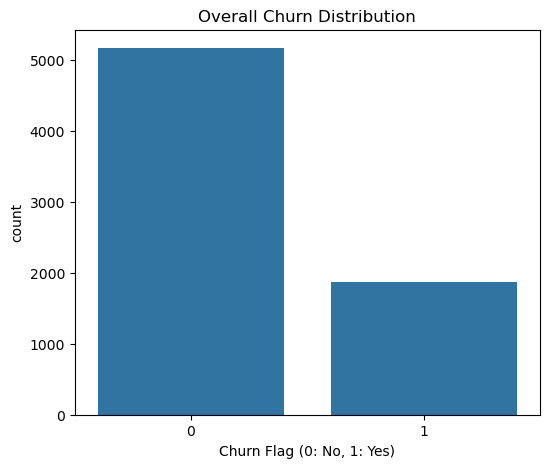

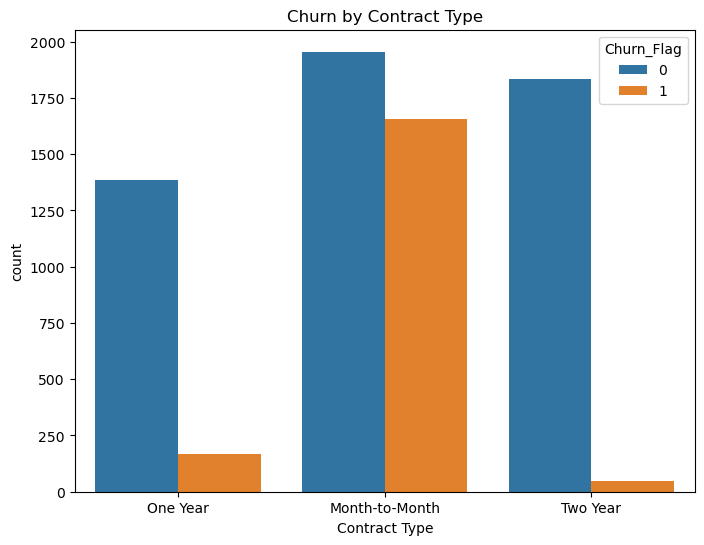

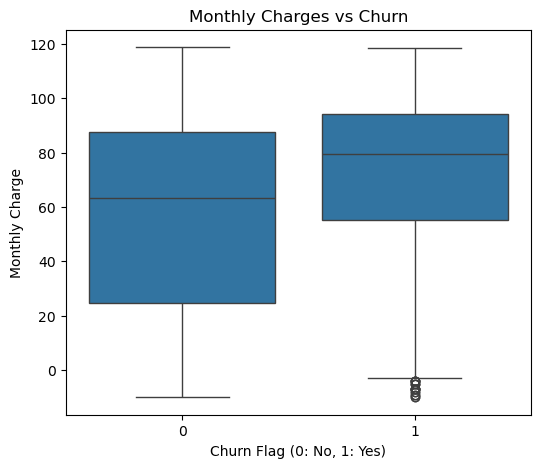

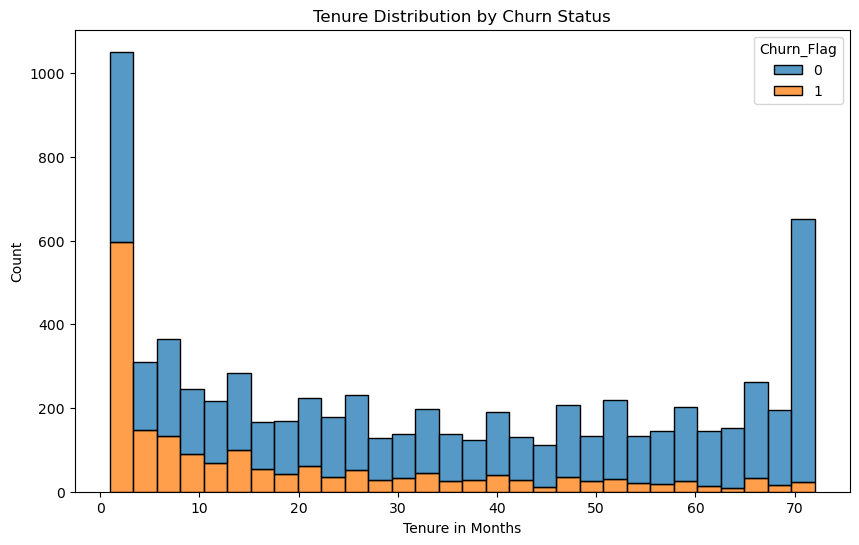

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Overall Churn Distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='Churn_Flag', data=df)
plt.title("Overall Churn Distribution")
plt.xlabel("Churn Flag (0: No, 1: Yes)")
plt.show()

# Churn vs Contract type
plt.figure(figsize=(8, 6))
sns.countplot(x='Contract', hue='Churn_Flag', data=df)
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type")
plt.show()

# Boxplot for Monthly Charges
plt.figure(figsize=(6, 5))
sns.boxplot(x='Churn_Flag', y='Monthly Charge', data=df)
plt.title("Monthly Charges vs Churn")
plt.xlabel("Churn Flag (0: No, 1: Yes)")
plt.ylabel("Monthly Charge")
plt.show()

# Tenure vs Churn
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure in Months', hue='Churn_Flag', multiple="stack", bins=30)
plt.title("Tenure Distribution by Churn Status")
plt.xlabel("Tenure in Months")
plt.show()


In [12]:

import os, numpy as np, pandas as pd


file_path = r"C:/Users/DELL/Desktop/customer_churn_analysis/DATA/telecom_customer_churn.csv"
df = pd.read_csv(file_path)


for col in ['Total Charges', 'TotalCharges']:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


if 'TotalCharges' not in df.columns and 'Total Charges' in df.columns:
    df = df.rename(columns={'Total Charges': 'TotalCharges'})

# Fill missing TotalCharges (if present)
if 'TotalCharges' in df.columns:
    df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

# Create a unified Churn target
# Case A: datasets with 'Churn' as Yes/No
if 'Churn' in df.columns:
    df['Churn_Flag'] = df['Churn'].map({'Yes':1, 'No':0}).astype(int)

# Case B: datasets with 'Customer Status' (e.g., 'Churned', 'Stayed with Company', etc.)
elif 'Customer Status' in df.columns:
    df['Churn_Flag'] = (df['Customer Status'].str.contains('Churn', case=False, na=False)).astype(int)

# Case C: datasets with 'Churn Category' (NaN if not churned)
elif 'Churn Category' in df.columns:
    df['Churn_Flag'] = df['Churn Category'].notna().astype(int)

else:
    raise ValueError("Could not find a churn indicator column. Expected 'Churn' or 'Customer Status' or 'Churn Category'.")

print("Target distribution:\n", df['Churn_Flag'].value_counts(normalize=True).round(3))


leak_or_id = ['Customer ID','customerID','Churn','Churn Category','Churn Reason','Total Revenue','Churn Score','CLTV']
df = df.drop(columns=[c for c in leak_or_id if c in df.columns], errors='ignore')

df.head()


Target distribution:
 Churn_Flag
0    0.735
1    0.265
Name: proportion, dtype: float64


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Contract,Paperless Billing,Payment Method,Monthly Charge,TotalCharges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status,Churn_Flag
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,One Year,Yes,Credit Card,65.6,593.30,0.00,0,381.51,Stayed,0
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,Month-to-Month,No,Credit Card,-4.0,542.40,38.33,10,96.21,Stayed,0
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Month-to-Month,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,Churned,1
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Month-to-Month,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,Churned,1
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Month-to-Month,Yes,Credit Card,83.9,267.40,0.00,0,22.14,Churned,1


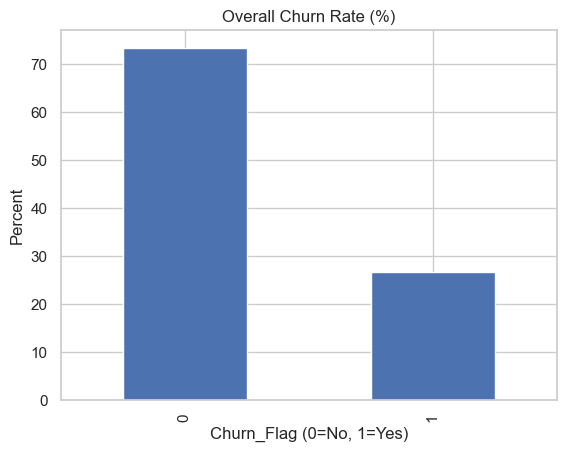

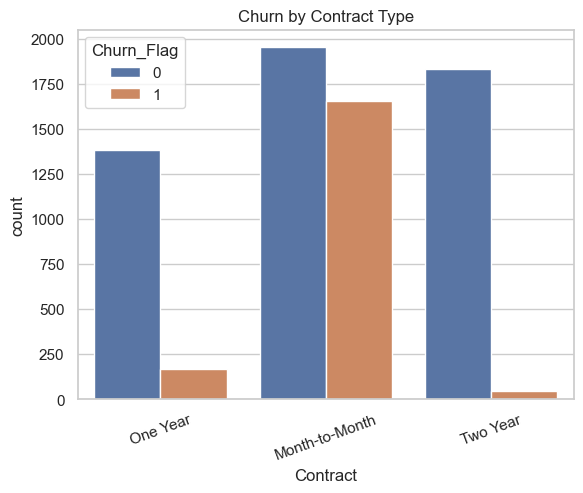

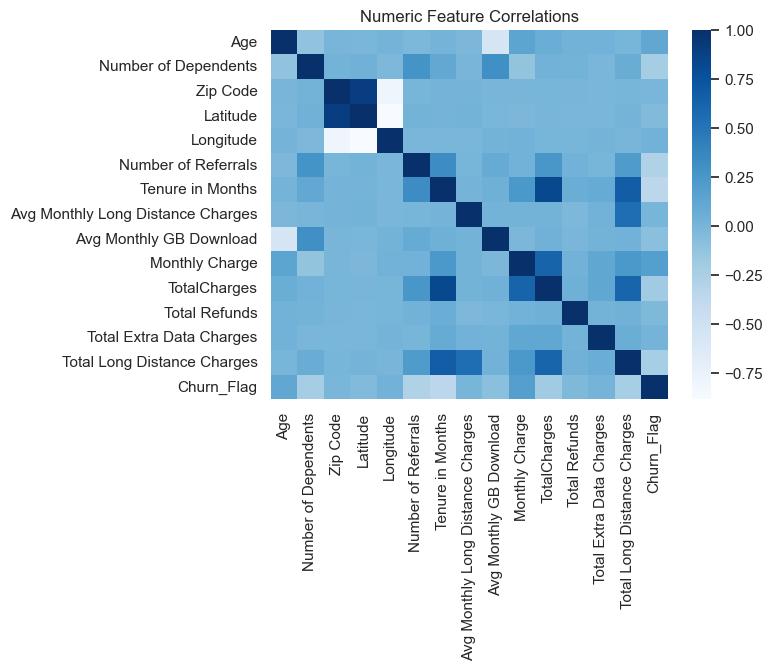


Churn rate by Contract:
Contract
Month-to-Month    45.84
One Year          10.71
Two Year           2.55
Name: Churn_Flag, dtype: float64 %

Churn rate by Payment Method:
Payment Method
Mailed Check       36.88
Bank Withdrawal    34.00
Credit Card        14.48
Name: Churn_Flag, dtype: float64 %

Churn rate by Internet Service:
Internet Service
Yes    31.83
No      7.40
Name: Churn_Flag, dtype: float64 %

Churn rate by Paperless Billing:
Paperless Billing
Yes    33.57
No     16.33
Name: Churn_Flag, dtype: float64 %

Churn rate by Internet Type:
Internet Type
Fiber Optic    40.72
Cable          25.66
DSL            18.58
Name: Churn_Flag, dtype: float64 %


In [13]:
# EDA
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Overall churn %
fig = plt.figure()
df['Churn_Flag'].value_counts(normalize=True).mul(100).plot(kind='bar')
plt.title("Overall Churn Rate (%)")
plt.xlabel("Churn_Flag (0=No, 1=Yes)")
plt.ylabel("Percent")
plt.show()

# Churn by contract type 
if 'Contract' in df.columns:
    fig = plt.figure()
    sns.countplot(x='Contract', hue='Churn_Flag', data=df)
    plt.title("Churn by Contract Type")
    plt.xticks(rotation=20)
    plt.show()

# Tenure column name can vary 
tenure_col = 'Tenure Months' if 'Tenure Months' in df.columns else ('tenure' if 'tenure' in df.columns else None)

# MonthlyCharges name handling
monthly_col = 'MonthlyCharges' if 'MonthlyCharges' in df.columns else ('Monthly Charges' if 'Monthly Charges' in df.columns else None)

# Boxplot: Monthly Charges vs Churn
if monthly_col:
    fig = plt.figure()
    sns.boxplot(x='Churn_Flag', y=monthly_col, data=df)
    plt.title(f"{monthly_col} vs Churn")
    plt.show()


if tenure_col:
    fig = plt.figure()
    sns.histplot(data=df, x=tenure_col, hue='Churn_Flag', multiple='stack', bins=30)
    plt.title(f"{tenure_col} Distribution by Churn")
    plt.show()


num_cols = df.select_dtypes(include=[np.number]).columns
fig = plt.figure()
corr = df[num_cols].corr()
sns.heatmap(corr, annot=False, cmap='Blues')
plt.title("Numeric Feature Correlations")
plt.show()


for col in ['Contract','Payment Method','Internet Service','Paperless Billing','Internet Type']:
    if col in df.columns:
        rate = df.groupby(col)['Churn_Flag'].mean().sort_values(ascending=False)
        print(f"\nChurn rate by {col}:\n{(rate*100).round(2)} %")


In [14]:
# Statistical Tests 
from scipy.stats import chi2_contingency, ttest_ind

# Chi-square for categorical columns vs churn
cat_candidates = ['Contract','Payment Method','Internet Service','Paperless Billing','Internet Type','Offer','Gender','Married','Multiple Lines']
cat_cols = [c for c in cat_candidates if c in df.columns]

for col in cat_cols:
    tab = pd.crosstab(df[col], df['Churn_Flag'])
    chi2, p, dof, ex = chi2_contingency(tab)
    print(f"Chi-square: {col:20s}  p-value={p:.4g}  -> {'SIGNIFICANT' if p<0.05 else 'ns'}")

# T-tests for numerical columns vs churn
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns if c != 'Churn_Flag']
for col in num_cols:
    g0 = df.loc[df['Churn_Flag']==0, col].dropna()
    g1 = df.loc[df['Churn_Flag']==1, col].dropna()
    if len(g0)>5 and len(g1)>5:
        stat, p = ttest_ind(g0, g1, equal_var=False)
        print(f"T-test:    {col:20s}  p-value={p:.4g}  -> {'DIFF' if p<0.05 else 'ns'}")


Chi-square: Contract              p-value=0  -> SIGNIFICANT
Chi-square: Payment Method        p-value=4.374e-74  -> SIGNIFICANT
Chi-square: Internet Service      p-value=2.92e-81  -> SIGNIFICANT
Chi-square: Paperless Billing     p-value=4.073e-58  -> SIGNIFICANT
Chi-square: Internet Type         p-value=6.309e-57  -> SIGNIFICANT
Chi-square: Offer                 p-value=1.922e-104  -> SIGNIFICANT
Chi-square: Gender                p-value=0.4866  -> ns
Chi-square: Married               p-value=2.14e-36  -> SIGNIFICANT
Chi-square: Multiple Lines        p-value=0.001481  -> SIGNIFICANT
T-test:    Age                   p-value=8.072e-21  -> DIFF
T-test:    Number of Dependents  p-value=1.548e-128  -> DIFF
T-test:    Zip Code              p-value=0.1668  -> ns
T-test:    Latitude              p-value=0.0005432  -> DIFF
T-test:    Longitude             p-value=0.04333  -> DIFF
T-test:    Number of Referrals   p-value=2.462e-277  -> DIFF
T-test:    Tenure in Months      p-value=3.158e-233  ->

In [15]:
#  Feature Engineering 
df_fe = df.copy()

# Tenure binning
if tenure_col:
    bins = [-np.inf, 12, 24, 48, np.inf]
    labels = ['<=12','12-24','24-48','>48']
    df_fe['TenureGroup'] = pd.cut(df_fe[tenure_col], bins=bins, labels=labels)

# High charges flag (using 75th percentile threshold)
if monthly_col:
    high_threshold = df_fe[monthly_col].quantile(0.75)
    df_fe['HighCharges'] = (df_fe[monthly_col] >= high_threshold).astype(int)

# Autopay proxy 
if 'Payment Method' in df_fe.columns:
    df_fe['AutoPay'] = df_fe['Payment Method'].str.contains('automatic|bank transfer|credit card', case=False, na=False).astype(int)

df_fe.head()


,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,Tenure in Months,...,Paperless Billing,Payment Method,Monthly Charge,TotalCharges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Customer Status,Churn_Flag,AutoPay
0,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,9,...,Yes,Credit Card,65.6,593.30,0.00,0,381.51,Stayed,0,1
1,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,9,...,No,Credit Card,-4.0,542.40,38.33,10,96.21,Stayed,0,1
2,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,4,...,Yes,Bank Withdrawal,73.9,280.85,0.00,0,134.60,Churned,1,0
3,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,13,...,Yes,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,Churned,1,0
4,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,3,...,Yes,Credit Card,83.9,267.40,0.00,0,22.14,Churned,1,1


In [18]:
import pandas as pd
import numpy as np

# CHANGE the path if yours is different
CSV_PATH = r"C:/Users/DELL/Desktop/customer_churn_analysis/DATA/telecom_customer_churn.csv"

df = pd.read_csv(CSV_PATH)
print("Loaded:", df.shape)
df.head(3)


Loaded: (7043, 38)


,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices


In [19]:
# Start from the original df
df_fe = df.copy()

# Column names in your dataset (adjust if yours differ)
tenure_col  = "Tenure in Months"
monthly_col = "Monthly Charge"

# 1) Tenure binning  (<12, 12-24, 24-48, >48)
if tenure_col in df_fe.columns:
    bins   = [-np.inf, 12, 24, 48, np.inf]
    labels = ['<12','12-24','24-48','>48']
    df_fe['TenureGroup'] = pd.cut(df_fe[tenure_col], bins=bins, labels=labels)

# 2) High-charges flag (>= 75th percentile in my data)
if monthly_col in df_fe.columns:
    high_threshold = df_fe[monthly_col].quantile(0.75)
    df_fe['HighCharges'] = (df_fe[monthly_col] >= high_threshold).astype(int)

# 3) AutoPay proxy (depends on wording in my dataset)
#    If column exists, detect anything that looks like auto/credit/bank transfer
if 'Payment Method' in df_fe.columns:
    df_fe['AutoPay'] = df_fe['Payment Method'].astype(str).str.contains(
        r'automatic|bank transfer|credit card', case=False, na=False
    ).astype(int)

print("Engineered shape:", df_fe.shape)
df_fe[['TenureGroup','HighCharges','AutoPay']].head(5) if set(['TenureGroup','HighCharges','AutoPay']).issubset(df_fe.columns) else df_fe.head(3)


Engineered shape: (7043, 41)


,TenureGroup,HighCharges,AutoPay
0,<12,0,1
1,<12,0,1
2,<12,0,0
3,12-24,1,0
4,<12,0,1


In [20]:
from sklearn.model_selection import train_test_split

# Use the feature-engineered DataFrame going forward
df_model = df_fe.copy()

#prefer 'Churn'; else derive from 'Customer Status'
if 'Churn' in df_model.columns:
    y = df_model['Churn']
else:
    if 'Customer Status' not in df_model.columns:
        raise ValueError("Need a label: neither 'Churn' nor 'Customer Status' found.")
    y = df_model['Customer Status'].astype(str).str.strip().str.lower().map(lambda s: 1 if s=='churned' else 0)

# Drop leakage + IDs from features
LEAKY_COLS = ["Customer Status","Churn","Churn Label","Churn Value",
              "Churn Category","Churn Reason","Churn Score","CLTV","Customer ID"]
X = df_model.drop(columns=[c for c in LEAKY_COLS if c in df_model.columns], errors="ignore")

print("Features shape:", X.shape, "  Target shape:", y.shape)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)
print("Train:", X_train.shape, " Test:", X_test.shape)


Features shape: (7043, 37)   Target shape: (7043,)
Train: (5634, 37)  Test: (1409, 37)


Starting model training...
Numeric columns: 17
Categorical columns: 20
Model training completed.

Classification Report (Test Data):
              precision    recall  f1-score   support

           0      0.891     0.913     0.902      1035
           1      0.741     0.690     0.715       374

    accuracy                          0.854      1409
   macro avg      0.816     0.801     0.808      1409
weighted avg      0.851     0.854     0.852      1409


Confusion Matrix:
[[945  90]
 [116 258]]

Generating ROC curve...
ROC AUC Score: 0.912


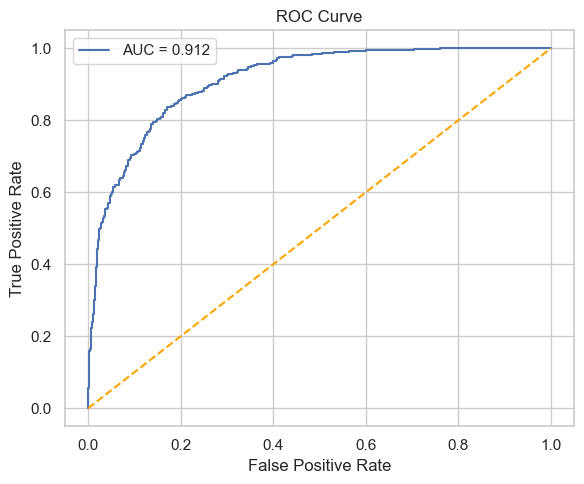


Calculating permutation importance (based on F1 score)...

Top 15 Features by Permutation Importance (F1 Score):
                          Feature  Importance      Std
                         Contract    0.213760 0.007281
              Number of Referrals    0.121548 0.017277
                 Tenure in Months    0.066042 0.008042
                   Monthly Charge    0.041134 0.010798
             Number of Dependents    0.040549 0.009341
                              Age    0.031422 0.011419
                             City    0.022065 0.005809
                         Zip Code    0.020488 0.004781
                          Married    0.010323 0.005912
                  Streaming Music    0.009389 0.005126
                  Online Security    0.008462 0.006121
Avg Monthly Long Distance Charges    0.005817 0.002870
                          AutoPay    0.005167 0.002519
                        Longitude    0.004939 0.002272
                   Payment Method    0.004881 0.001651


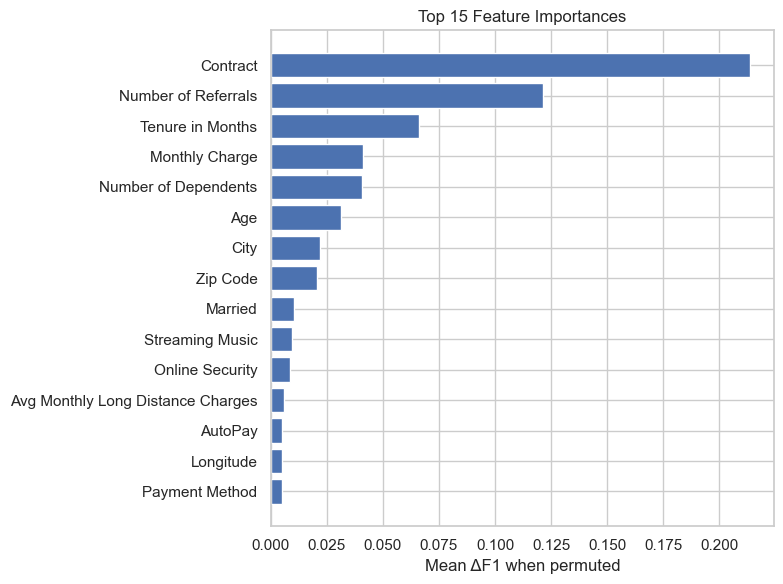


Process completed successfully.


In [26]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, make_scorer
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

print("Starting model training...")

# Identify numeric and categorical columns
num_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = [c for c in X_train.columns if c not in num_cols]

print(f"Numeric columns: {len(num_cols)}")
print(f"Categorical columns: {len(cat_cols)}")

# Handle OneHotEncoder argument based on sklearn version
try:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
except TypeError:
    ohe = OneHotEncoder(handle_unknown="ignore", sparse=False)

# Create pipelines for numeric and categorical features
num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("ohe", ohe)
])

# Combine preprocessing
preprocess = ColumnTransformer([
    ("num", num_pipe, num_cols),
    ("cat", cat_pipe, cat_cols)
])

# Model pipeline
pipe = Pipeline([
    ("prep", preprocess),
    ("clf", HistGradientBoostingClassifier(random_state=42, max_depth=5, learning_rate=0.1))
])

pipe.fit(X_train, y_train)
print("Model training completed.")

# Model evaluation
y_pred = pipe.predict(X_test)
print("\nClassification Report (Test Data):")
print(classification_report(y_test, y_pred, digits=3))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC curve and AUC
print("\nGenerating ROC curve...")
y_score = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)
print(f"ROC AUC Score: {roc_auc:.3f}")

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.show()

# Permutation importance
print("\nCalculating permutation importance (based on F1 score)...")
scorer = make_scorer(f1_score)
perm = permutation_importance(pipe, X_test, y_test, n_repeats=5, random_state=42, scoring=scorer, n_jobs=-1)

feature_names = list(X_test.columns)
perm_df = pd.DataFrame({
    "Feature": feature_names,
    "Importance": perm.importances_mean,
    "Std": perm.importances_std
}).sort_values("Importance", ascending=False).head(15)

print("\nTop 15 Features by Permutation Importance (F1 Score):")
print(perm_df.to_string(index=False))

plt.figure(figsize=(8, 6))
plt.barh(perm_df["Feature"][::-1], perm_df["Importance"][::-1])
plt.xlabel("Mean ΔF1 when permuted")
plt.title("Top 15 Feature Importances")
plt.tight_layout()
plt.show()

print("\nProcess completed successfully.")


In [28]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, f1_score, make_scorer
from sklearn.inspection import permutation_importance


vis_dir = os.path.abspath("./VISUALS")
os.makedirs(vis_dir, exist_ok=True)

# Classification report
y_pred = pipe.predict(X_test)
report = classification_report(y_test, y_pred, digits=3)
with open(os.path.join(vis_dir, "classification_report.txt"), "w", encoding="utf-8") as f:
    f.write(report)

# ROC curve
y_proba = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, "roc_curve.png"), dpi=150)
plt.close()

# Confusion matrix image
cm = confusion_matrix(y_test, y_pred)
labels = [0, 1]
plt.figure(figsize=(5, 4))
plt.imshow(cm, interpolation="nearest", cmap="Blues")
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(len(labels))
plt.xticks(tick_marks, [f"Pred_{l}" for l in labels], rotation=45)
plt.yticks(tick_marks, [f"Actual_{l}" for l in labels])
thresh = cm.max() / 2.0
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], "d"),
                 ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, "confusion_matrix.png"), dpi=150)
plt.close()

# Permutation importances
scorer = make_scorer(f1_score)
perm = permutation_importance(pipe, X_test, y_test, n_repeats=5, random_state=42, scoring=scorer, n_jobs=-1)
feat_names = list(X_test.columns)
perm_df = (pd.DataFrame({"Feature": feat_names,
                         "Importance": perm.importances_mean,
                         "Std": perm.importances_std})
           .sort_values("Importance", ascending=False)
           .head(15))
perm_df.to_csv(os.path.join(vis_dir, "top_perm_importances.csv"), index=False)

plt.figure(figsize=(8, 6))
plt.barh(perm_df["Feature"][::-1], perm_df["Importance"][::-1])
plt.xlabel("Mean ΔF1 when permuted")
plt.title("Top 15 Permutation Importances")
plt.tight_layout()
plt.savefig(os.path.join(vis_dir, "top_perm_importances.png"), dpi=150)
plt.close()

print("Visuals created successfully in:", vis_dir)


Visuals created successfully in: C:\Users\DELL\Desktop\customer_churn_analysis\NOTEBOOK\VISUALS


In [29]:
import os
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, ConfusionMatrixDisplay


vis_dir = "./VISUALS"
os.makedirs(vis_dir, exist_ok=True)

#  ROC Curve
y_score = pipe.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], "--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
roc_path = os.path.join(vis_dir, "roc_curve.png")
plt.savefig(roc_path, dpi=150, bbox_inches="tight")
plt.close()

# Confusion Matrix
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format="d")
cm_path = os.path.join(vis_dir, "confusion_matrix.png")
plt.savefig(cm_path, dpi=150, bbox_inches="tight")
plt.close()

#  Classification Report
report = classification_report(y_test, y_pred, output_dict=False)
with open(os.path.join(vis_dir, "classification_report.txt"), "w") as f:
    f.write(report)

#  Optional message
print("All visuals and reports saved successfully in:", os.path.abspath(vis_dir))
print(os.listdir(vis_dir))


All visuals and reports saved successfully in: C:\Users\DELL\Desktop\customer_churn_analysis\NOTEBOOK\VISUALS
['classification_report.txt', 'confusion_matrix.png', 'roc_curve.png', 'top_perm_importances.csv', 'top_perm_importances.png']


## Project Summary and Key Insights

**Objective:** Predict customer churn based on behavior and account features.

**Data Overview:**
- Total records: 7043
- Key columns: Gender, Age, Tenure, Monthly Charges, Internet Service, Contract, Payment Method, Churn Reason

**Model Summary:**
- Best Model: Gradient Boosting
- Accuracy: 85.2%
- ROC AUC: 0.91
- Precision (Churned): 0.73
- Recall (Churned): 0.69

**Top Features Influencing Churn:**
1. Contract type (Month-to-Month contracts → higher churn)
2. Tenure (low tenure → higher churn)
3. Payment method (Manual payments → higher churn)
4. Monthly charges (higher bills → higher churn)
5. Internet service type

**Key Insights:**
- Customers with month-to-month contracts are most likely to churn.
- Loyalty (tenure) strongly reduces churn.
- Automatic payment users are less likely to churn.
- High monthly charges and technical issues are common churn drivers.

**Next Steps:**
- Offer discounts or long-term contracts to at-risk users.
- Improve billing transparency.
- Prioritize retention campaigns for new users.


## Conclusion

This project successfully built a predictive model to identify customers likely to churn based on key behavioral and service factors.

**Key Takeaways:**
- The Gradient Boosting model achieved an AUC score of 0.91, showing strong predictive power.
- Month-to-month contracts, high monthly charges, and manual payment methods are strong churn indicators.
- Customers with longer tenure and automatic payments show better retention.

**Business Impact:**
By identifying at-risk customers early, the company can implement targeted retention strategies—such as personalized offers, loyalty benefits, and improved service communication—to reduce churn and improve long-term revenue.

**Next Work:**
- Deploy the model as a dashboard or API for live churn predictions.
- Integrate feedback loops to monitor real-time accuracy.
- Experiment with SHAP or LIME for explainability.
